<div dir="rtl">

# گزارش ۱
# آریان فتحی
# 40013023
---
</div>
<div dir="rtl">
<font size="4"></font>
موضوع پروژه، پیاده سازی شبکه عصبی پرسپترون و نحوه اپدیت و یادگیری آن میباشد.
میدانیم که شبکه عصبی پرسپترون ساده ترین نوع شبکه عصبی بوده و فقط برای دیتاست هایی کاربرد دارد که خطی جدایی پذیر باشند، یعنی بتوان ابرصفحه ای پیدا کرد که دیتاهای درحال بررسی را در دو زیرفضای مجزا قرار دهد.
در این پروژه برآن شدیم تا شبکه عصبی پرسپترون و الگوریتم یادگیری آن را پیاده سازی کنیم، در ادامه نیز فرمول های بدست آمده را پیاده سازی و سپس به توضیح باقی پروژه میپردازیم.
</div>
<br/>

---
<br/>
<div dir="rtl">
<font size="3"><font/>
در ابتدا کتابخانه هایی که به آنها برای راه اندازی پروژه نیاز داریم را ایمپورت میکنیم، این کتابخانه ها عبارت هستند از numpy که برای محاسبات برداری و ماتریسی بسیار مناسب هستند، matplotlib برای نمایش دیتاست هاو در آخر  sklearn.dataset که برای تولید دیتاست مصنوعی جهت تست کردن پرسپترون مورد نظر استفاده میشود


</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

<div dir="rtl">
<font size="3"><font/>
حال با استفاده از make_blobs دیتاستی که مایل هستیم جهت تست و آزمایش شبکه پرسپترون خود بکار ببریم، تولید میکنیم، در این نمونه ۲۴۰ رکورد که هر رکورد ۲ فیچر داشته را در نظر میگیریم که خطی جدایی پذیر نیز هستند، X بردار فیچر ها بوده و y لیبل را مشخص میکند.
برای راحتی محاسبات ترانهاده X را در ادامه بکار گرفته و زمانی که خواستیم دیتاست بدست امده رو تست کنیم، دوباره از آن ترانهاده گرفته تا قابل رسم باشد.
و در آخر نیز لیبل های ۰ را با -۱ جایگذاری میکنیم، فرض این است که شبکه عصبی ما یا خروجی +۱ میدهد یا -۱
</div>

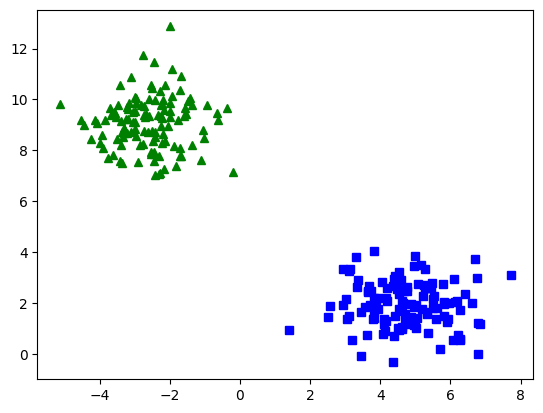

In [29]:
X, Y = make_blobs(n_samples=240, centers=2, n_features=2, random_state=42)
plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'g^')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
plt.show()
# taking transpose X for easier calculation
Y[Y == 0] = -1

<br/>
<div dir="rtl">
<font size="3"><font/>
ابتدا کلاس F  را برای پیاده سازی توابع استاتیکی که در محاسبات ما نقش بسزایی اعمال میکنند تعریف میکنیم، در پروژه پرسپترون فقط تابع sign که در نقش یک تابع فعالساز میباشد، پیاده سازی میشود و وظیفه آن برگرداندن مقدار خروجی +۱ برای مقادیر نامنفی و -۱ برای مقادیر منفی میباشد
</div>
<br/>

In [30]:
class F:
    @staticmethod
    def sign(x):
        if x >= 0:
            return 1
        else:
            return -1

<div dir="rtl">
<font size="3"><font/>
در نهایت به پیاده سازی کلاس پرسپترون میرسیم که وظیفه آن نگهداری وزن ها و بایاس، و محاسبه کردن مقدار خروجی با استفاده از این وزن ها و بایاس به ازای n ویژگی که به عنوان ورودی دریافت شده است، میباشد.
این کلاس از دوتابع ساده که اولین تابع در نقش کانستراکتور میباشد و دومی در نقش forwarding مقادیر ورودی و محاسبه مقدار خروجی میباشد.
در تابع کاسنتراکتور که در زبان پایتون به اسم __init__ دیده میشود، به سایز بردار فیچرها، n + 1 مقدار رندوم به وزن ها و بایاس اختصاص میدهد.
<br>
در تابع forward نیز، تنها ضرب بردار وزن ها و بردار دیتاست و در نهایت جمع بردار حاصل شده با بردار بایاس محاسبه میشود،
در اصل تابع forward طوری پیاده سازی شده است که مقدار خروجی را برای تمامی دیتاپوینت های موجود در دیتاست مورد نظر محاسبه کند، یعنی خروجی این تابع، یک بردار ۱ در n بوده که مقدار خروجی را برای هر n دیتاپوینت محاسبه کرده و درنهایت برمیگرداند.

در اصل در بردار دیتاست ما، تعداد سطر ها، نمایانگر سایز فیچر ها، و تعداد ستون ها، تعداد دیتاپوینت ها یا رکورد هارا نشان میدهد.
</div>

In [31]:
class Perceptron:
    def __init__(self, input_size = 1):
        self.W = np.random.rand(input_size)
        self.b = np.random.rand(1)
    def forward(self, input):
        return F.sign(np.dot(input, self.W) + self.b)


<div dir="rtl">
<font size="3"><font/>
در نهایت به کلاس Optimizer میرسیم که وظیفه آن اجرای الگوریتم یادگیری پرسپترون میباشد، میدانیم که اگر یک دیتاست خطی جدایی پذیر باشد، الگوریتم یادگیری پرسپترون پس از تعداد متناهی اجرا، به ۰ همگرا میشود.
<br>
در این کلاس نیز دوتابع داریم که تابع اول یا کانستراکتور به عنوان ورودی مدل پرسپترون را دریافت میکند، به عبارتی دیگر، کلاس optimizer به کلاس Perceptron دسترسی دارد و میتواند وزن ها و بایاس آن را تغییر دهد.
در تابع update نیز تنها فرمول هایی که برای آپدیت کردن وزن ها و بایاس بر اساس لیبل هایی که اشتباه پیشبینی شده، پیاده سازی شده اند.
طبق روابطی که از قبل میدانیم و اثبات کردیم، مقداری که با بایاس و وزن ها جمع میشود، همواره ابرصفحه موردنظر را در راستای بهبود حرکت میدهد.
این تابع تنها یک دیتاپوینت را به عنوان ورودی دریافت میکند.
</div>

In [32]:
class Optimizer:
    def __init__(self, model):
        self.model = model
    def update(self, x, y, y_hat):
        if y_hat != y:
            self.model.b += y - y_hat
            self.model.W += (y - y_hat) * x
            return

<div dir="rtl">
<font size="3"><font/>
در این بخش، تنها دو instance از Perceptron و Optimizer گرفته شده است، که به ترتیب با اسامی ‌ p و optimizer تعریف شده اند.
</div>

In [33]:
p = Perceptron(X.shape[1])
optimizer = Optimizer(p)

In [50]:
n_iter = 1000
for _ in range(n_iter):
    for x, y in zip(X, Y):
        y_hat = p.forward(x)
        optimizer.update(x, y, y_hat)

<div dir="rtl">
<font size="3"><font/>
در این بخش نیز تنها معادله خط، ابرصفحه حاصل شده، به فرم y = ax+ b نوشته میشود و در اخر در کنار دیگر نقاط آن را پلات میکنیم.
<br>
دقت کنید که چون مقیاس های رسم ابرصفحه با نقاط هماهنگی ندارد و همچنین از تقسیم های پی در پی برای رسم خط در نظر گرفتیم ممکن است کمی خطا در رسم رخ داده و یکی از نقاط در مرز قرار بگیرد، درحالی که لیبل ها همگی درست پیش بینی شده اند.
<br>
ملاک درستی کد را مقدار متغیر miss در نظر بگیرید.
</div>

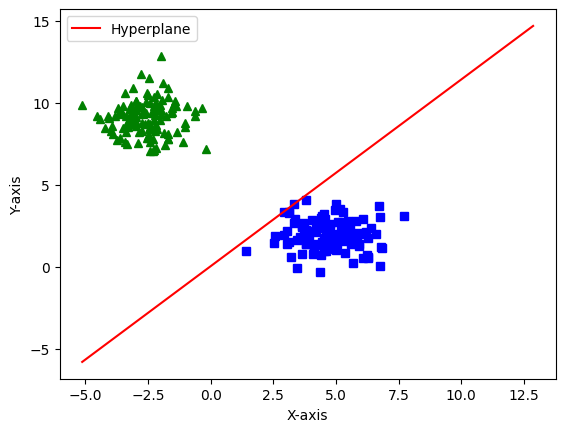

In [51]:
def line_calculation(x):
    return -1 * (p.W[0] / p.W[1]) * x - (p.b / p.W[1])

x1_domain = np.linspace(X.min(), X.max(), 100)
x2_domain = line_calculation(x1_domain)
plt.plot(X[:, 0][Y == -1], X[:, 1][Y == -1], 'g^')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
plt.plot(x1_domain, x2_domain, color='red', label='Hyperplane')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend()

plt.show()
